In [93]:
import pandas as pd
import numpy as np

Nous commençons par le nettoyage de nos données (data cleaning) et l'ingénierie des caractéristiques (feature engineering) pour transformer nos variables dans les bons types avant la manipulation

In [112]:
df = pd.read_excel('/content/data-combined.xlsx')

In [113]:
df

,Unnamed: 0,Compagnie,Total d'escales,Prix,Duree,Destination,Distance,Date_aller,Date_retour
0,0,Air France,\ndirect,\n204 €,\n2h 20min,Oslo,1344.00,2022-04-01,2022-04-08
1,1,Air France,\ndirect,\n204 €,\n2h 30min,Oslo,1344.00,2022-04-01,2022-04-08
2,2,Flyr AS,\ndirect,\n195 €,\n2h 25min,Oslo,1344.00,2022-04-01,2022-04-08
3,3,Flyr AS,\ndirect,\n195 €,\n2h 25min,Oslo,1344.00,2022-04-01,2022-04-08
4,4,Norwegian,\ndirect,\n186 €,\n2h 20min,Oslo,1344.00,2022-04-01,2022-04-08
...,...,...,...,...,...,...,...,...,...
61343,61343,Turkish Airlines,\n1 escale,\n294 €,\n7h 20min,Athenes,2095.52,2022-06-10,2022-06-17
61344,61344,Sky Express,\ndirect,\n1 874 €,\n3h 00min,Athenes,2095.52,2022-06-10,2022-06-17
61345,61345,SWISS,\n1 escale,\n1 874 €,\n5h 30min,Athenes,2095.52,2022-06-10,2022-06-17
61346,61346,Sky Express,\ndirect,\n1 879 €,\n3h 00min,Athenes,2095.52,2022-06-10,2022-06-17


In [114]:
df = df.replace('\n','', regex=True)
#df = df.replace('\xa','', regex=True)

In [115]:
df.columns

Index(['Unnamed: 0', 'Compagnie', 'Total d'escales', 'Prix', 'Duree',
       'Destination', 'Distance', 'Date_aller', 'Date_retour'],
      dtype='object')

In [116]:
total_stops= list(df["Total d'escales"])
price = list(df['Prix'])
duration = list(df['Duree'])

In [117]:
def formatage_prix(liste):
    l=[]
    for i in range (len(liste)):
        c=''
        if len(liste[i]) == 6 :
            c = float(liste[i][0]+liste[i][1]+price[i][2])
        elif len(liste[i]) == 5 : 
            c = float(liste[i][0]+liste[i][1])
        elif len(liste[i]) == 8:
            c = float(liste[i][0]+liste[i][2]+liste[i][3]+ liste[i][4])
        else:
            c = 'NaN'
        l.append(c)
    return l

In [118]:
prix = formatage_prix(price)

In [119]:
def formatage_duree(liste):
    l=[]
    for i in range (len(liste)):
        l.append(float(duration[i].split('h')[0])+float(duration[i].split('h')[1][1:3])/60)
    return l   

In [120]:
duree = formatage_duree(duration)

In [121]:
del df['Prix']

In [122]:
del df['Duree']

In [123]:
df['Prix'] = prix

In [124]:
df['Duree de vol'] = duree

In [125]:
df

,Unnamed: 0,Compagnie,Total d'escales,Destination,Distance,Date_aller,Date_retour,Prix,Duree de vol
0,0,Air France,direct,Oslo,1344.00,2022-04-01,2022-04-08,204.0,2.333333
1,1,Air France,direct,Oslo,1344.00,2022-04-01,2022-04-08,204.0,2.500000
2,2,Flyr AS,direct,Oslo,1344.00,2022-04-01,2022-04-08,195.0,2.416667
3,3,Flyr AS,direct,Oslo,1344.00,2022-04-01,2022-04-08,195.0,2.416667
4,4,Norwegian,direct,Oslo,1344.00,2022-04-01,2022-04-08,186.0,2.333333
...,...,...,...,...,...,...,...,...,...
61343,61343,Turkish Airlines,1 escale,Athenes,2095.52,2022-06-10,2022-06-17,294.0,7.333333
61344,61344,Sky Express,direct,Athenes,2095.52,2022-06-10,2022-06-17,1874.0,3.000000
61345,61345,SWISS,1 escale,Athenes,2095.52,2022-06-10,2022-06-17,1874.0,5.500000
61346,61346,Sky Express,direct,Athenes,2095.52,2022-06-10,2022-06-17,1879.0,3.000000


In [108]:
df.head()

,Unnamed: 0,Compagnie,Total d'escales,Destination,Distance,Date_aller,Date_retour,Prix,Duree de vol
0,0,Air France,\ndirect,Oslo,1344.0,2022-04-01,2022-04-08,NaN,2.333333
1,1,Air France,\ndirect,Oslo,1344.0,2022-04-01,2022-04-08,NaN,2.500000
2,2,Flyr AS,\ndirect,Oslo,1344.0,2022-04-01,2022-04-08,NaN,2.416667
3,3,Flyr AS,\ndirect,Oslo,1344.0,2022-04-01,2022-04-08,NaN,2.416667
4,4,Norwegian,\ndirect,Oslo,1344.0,2022-04-01,2022-04-08,NaN,2.333333


In [207]:
def formatage_escale(df):
    a = pd.DataFrame([df["Total d'escales"] != "direct ", df["Total d'escales"] != "O changement "])
    df["Total d'escales"] = a.all().astype(np.int64) + (df["Total d'escales"] == "2 escales ").astype(np.int64) + (df["Total d'escales"] == "3 escales ").astype(np.int64)
    return(df)


In [209]:
formatage_escale(df)

,Unnamed: 0,Compagnie,Total d'escales,Destination,Distance,Date_aller,Date_retour,Prix,Duree de vol
0,0,Air France,0,Oslo,1344.00,2022-04-01,2022-04-08,204.0,2.333333
1,1,Air France,0,Oslo,1344.00,2022-04-01,2022-04-08,204.0,2.500000
2,2,Flyr AS,0,Oslo,1344.00,2022-04-01,2022-04-08,195.0,2.416667
3,3,Flyr AS,0,Oslo,1344.00,2022-04-01,2022-04-08,195.0,2.416667
4,4,Norwegian,0,Oslo,1344.00,2022-04-01,2022-04-08,186.0,2.333333
...,...,...,...,...,...,...,...,...,...
61343,61343,Turkish Airlines,1,Athenes,2095.52,2022-06-10,2022-06-17,294.0,7.333333
61344,61344,Sky Express,0,Athenes,2095.52,2022-06-10,2022-06-17,1874.0,3.000000
61345,61345,SWISS,1,Athenes,2095.52,2022-06-10,2022-06-17,1874.0,5.500000
61346,61346,Sky Express,0,Athenes,2095.52,2022-06-10,2022-06-17,1879.0,3.000000


In [216]:
df

,Unnamed: 0,Compagnie,Total d'escales,Destination,Distance,Date_aller,Date_retour,Prix,Duree de vol
0,0,Air France,0,Oslo,1344.00,2022-04-01,2022-04-08,204.0,2.333333
1,1,Air France,0,Oslo,1344.00,2022-04-01,2022-04-08,204.0,2.500000
2,2,Flyr AS,0,Oslo,1344.00,2022-04-01,2022-04-08,195.0,2.416667
3,3,Flyr AS,0,Oslo,1344.00,2022-04-01,2022-04-08,195.0,2.416667
4,4,Norwegian,0,Oslo,1344.00,2022-04-01,2022-04-08,186.0,2.333333
...,...,...,...,...,...,...,...,...,...
61343,61343,Turkish Airlines,1,Athenes,2095.52,2022-06-10,2022-06-17,294.0,7.333333
61344,61344,Sky Express,0,Athenes,2095.52,2022-06-10,2022-06-17,1874.0,3.000000
61345,61345,SWISS,1,Athenes,2095.52,2022-06-10,2022-06-17,1874.0,5.500000
61346,61346,Sky Express,0,Athenes,2095.52,2022-06-10,2022-06-17,1879.0,3.000000


In [237]:
#on supprime 

df= df[df['Compagnie']!= 'SNCF']

In [234]:
x=df[df['Compagnie']=='SNCF']

In [240]:
df

,Unnamed: 0,Compagnie,Total d'escales,Destination,Distance,Date_aller,Date_retour,Prix,Duree de vol
0,0,Air France,0,Oslo,1344.00,2022-04-01,2022-04-08,204.0,2.333333
1,1,Air France,0,Oslo,1344.00,2022-04-01,2022-04-08,204.0,2.500000
2,2,Flyr AS,0,Oslo,1344.00,2022-04-01,2022-04-08,195.0,2.416667
3,3,Flyr AS,0,Oslo,1344.00,2022-04-01,2022-04-08,195.0,2.416667
4,4,Norwegian,0,Oslo,1344.00,2022-04-01,2022-04-08,186.0,2.333333
...,...,...,...,...,...,...,...,...,...
61343,61343,Turkish Airlines,1,Athenes,2095.52,2022-06-10,2022-06-17,294.0,7.333333
61344,61344,Sky Express,0,Athenes,2095.52,2022-06-10,2022-06-17,1874.0,3.000000
61345,61345,SWISS,1,Athenes,2095.52,2022-06-10,2022-06-17,1874.0,5.500000
61346,61346,Sky Express,0,Athenes,2095.52,2022-06-10,2022-06-17,1879.0,3.000000


In [235]:
x

,Unnamed: 0,Compagnie,Total d'escales,Destination,Distance,Date_aller,Date_retour,Prix,Duree de vol


In [238]:
df.to_csv("data_formate.csv")

In [239]:
data_formate.to_excel('data-formate.xlsx')

In [ ]:
import os

In [133]:
import os
os.getcwd()

'/content'

# Analyse exploratoire de données

Il s'agit de données de prix de billets d'avions entre Paris et 5 destinations (Londres, Moscou, Oslo, Madrid et Athènes) pour des allers-retours entre début avril et fin septembre 2022 pour lesquelles nous avons relévé 8 caractéristiques à savoir:

• Le nom de la compagnie  
• Le nombre d'escales

• Le prix du billet d'avion

• La durée du trajet

• La destination

• La distance entre Paris et la ville de destination

• La date d'aller

• Et enfin la date de retour

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/data_formate.csv')

In [8]:
df

,Unnamed: 0,Unnamed: 0.1,Compagnie,Total d'escales,Destination,Distance,Date_aller,Date_retour,Prix,Duree de vol
0,0,0,Air France,0,Oslo,1344.00,2022-04-01,2022-04-08,204.0,2.333333
1,1,1,Air France,0,Oslo,1344.00,2022-04-01,2022-04-08,204.0,2.500000
2,2,2,Flyr AS,0,Oslo,1344.00,2022-04-01,2022-04-08,195.0,2.416667
3,3,3,Flyr AS,0,Oslo,1344.00,2022-04-01,2022-04-08,195.0,2.416667
4,4,4,Norwegian,0,Oslo,1344.00,2022-04-01,2022-04-08,186.0,2.333333
...,...,...,...,...,...,...,...,...,...,...
61335,61343,61343,Turkish Airlines,1,Athenes,2095.52,2022-06-10,2022-06-17,294.0,7.333333
61336,61344,61344,Sky Express,0,Athenes,2095.52,2022-06-10,2022-06-17,1874.0,3.000000
61337,61345,61345,SWISS,1,Athenes,2095.52,2022-06-10,2022-06-17,1874.0,5.500000
61338,61346,61346,Sky Express,0,Athenes,2095.52,2022-06-10,2022-06-17,1879.0,3.000000


In [7]:
# On supprime les observations où le nom de la compagnie est SNCF

df= df[df['Compagnie']!= 'SNCF']

In [9]:
#variables et types des données
df.dtypes

Unnamed: 0           int64
Unnamed: 0.1         int64
Compagnie           object
Total d'escales      int64
Destination         object
Distance           float64
Date_aller          object
Date_retour         object
Prix               float64
Duree de vol       float64
dtype: object

In [10]:
df.isnull().sum()

Unnamed: 0         0
Unnamed: 0.1       0
Compagnie          0
Total d'escales    0
Destination        0
Distance           0
Date_aller         0
Date_retour        0
Prix               0
Duree de vol       0
dtype: int64

Il est normal qu'il n'y ait pas de données manquantes pour ce dataset particulier puisque notre dataset est un ensemble de données de ventes de prix de billets d'avions

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,61340.0,30670.808119,17709.372295,0.000000,15334.750000,30669.5,46004.250000,61347.00
Unnamed: 0.1,61340.0,30670.808119,17709.372295,0.000000,15334.750000,30669.5,46004.250000,61347.00
Total d'escales,61340.0,0.543560,0.523383,0.000000,0.000000,1.0,1.000000,2.00
Distance,61340.0,1464.735401,572.233639,342.760000,1054.000000,1054.0,2095.520000,2486.34
Prix,61340.0,297.314966,321.272124,33.000000,153.000000,219.0,333.000000,3768.00
Duree de vol,61340.0,4.840924,3.004447,1.083333,2.083333,4.5,6.416667,28.25


On obtient des éléments statistques (moyenne, écart-type, quartile, ...) pour la distance, le prix, la durée du vol et le nombre d'escales.  

Commençons par tracer une distribution de notre variable cible (Prix):

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


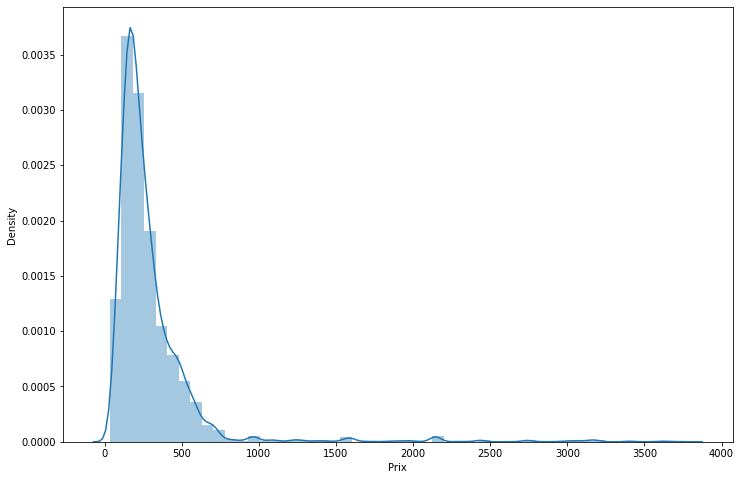

In [12]:
plt.figure(figsize=(12,8))
sns.distplot(df['Prix']);

Les prix de billets d'avion tombent sont en très grande majorité entre 0 et 1000 €.


In [32]:
#Regardons les variables qui sont le plus corrélés au Prix

df.corr()['Prix'].sort_values()

Unnamed: 0        -0.078995
Unnamed: 0.1      -0.078995
Total d'escales    0.093742
Duree de vol       0.145177
Distance           0.303055
Prix               1.000000
Name: Prix, dtype: float64

Dans les prochaines sections nous poussons notre analyse avec la matrice de corrélation et l'analyse en composante principale (PCA)

# Tableau de corrélation

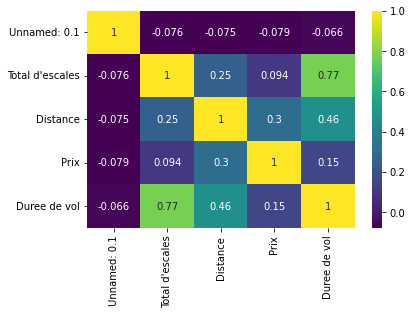

<function seaborn.matrix.heatmap>

In [17]:
sns.heatmap(data=df.iloc[:, 1:10].corr(), cmap = 'viridis', annot=True)
plt.show()
sns.heatmap

Cette matrice des corrélations linéaires entre les différentes variables quantitatives de notre jeu de données nous montre l'existence:

• d'une très grande corrélation positive entre le nombre total d'escales et la durée du vol.

• d'une corrélation positive entre le prix du billet d'avion et la distance du trajet.

• d'une faible corrélation entre le prix du billet d'avion et la durée du vol.

• d'une corrélation positive entre la distance et la durée du vol. 



Nous essayons de supprimer les valeurs extrêmes du prix que nous avons fixé arbitrairement au top 1% des prix de billets d'avion les plus élévés. 

In [22]:
# Le top 1% des billets d'avion les plus chers
len(df)*0.01

613.4

In [23]:
# on élimine de notre jeu de données les prix extrêmes 
non_top_1_perc= df.sort_values('Prix', ascending= False).iloc[:614]

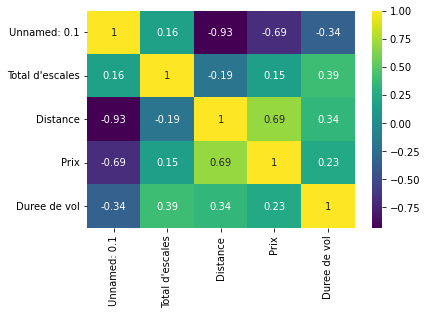

In [28]:

sns.heatmap(data=non_top_1_perc.iloc[:, 1:10].corr(), cmap = 'viridis', annot=True)
plt.show()

En éliminant ces valeurs extrêmes on a maintenant:

• une grande corrélation entre la distance le prix du billet d'avion;

• d'une  corrélation négative entre la distance et le nombre total d'escales mais certes faible;

• d'une corrélation positive entre la durée du vol et la distance du trajet ce qui est normal;

•d'une faible corrélation positive entre la durée du vol et le prix




#ACP

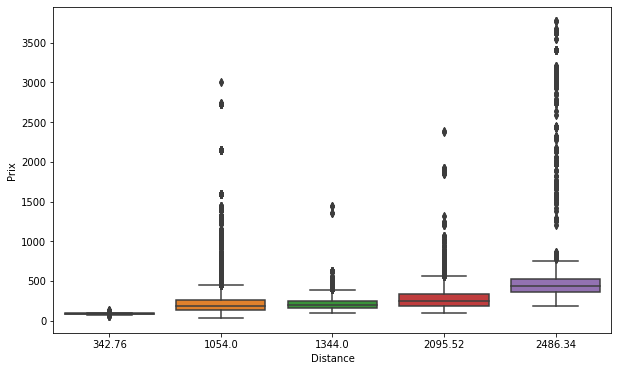

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Distance', y='Prix', data=df)

Il y a une très grande variation des prix pour des distances entre 1344 km et 2486.34km de vol.

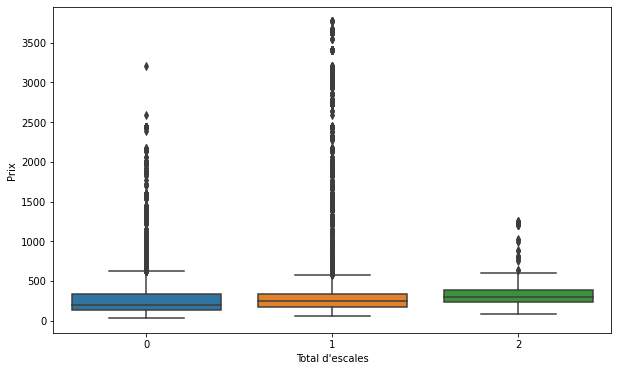

In [35]:

# Regardons la distribution des prix par nombre d'escales 

plt.figure(figsize=(10,6))
sns.boxplot(x="Total d'escales", y='Prix', data=df)

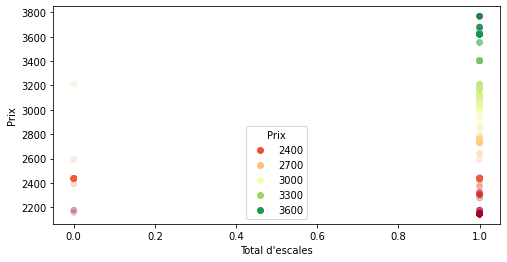

In [41]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="Total d'escales",y='Prix',
                data=non_top_1_perc,hue='Prix',
                palette='RdYlGn',edgecolor=None,alpha=0.2);